In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(1)
plt.style.use('seaborn')

# set params
N, n_feature = 5000, 3
lr = 0.01
epochs = 500
b_size = 256
n_batch = N//b_size

t_W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
t_b = np.random.uniform(-1, 1, 1)
W = np.random.uniform(-1, 1, n_feature).reshape(-1, 1)
b = np.random.uniform(-1, 1, 1).reshape(1, 1)


# generate dataset
x_data = np.random.normal(0, 1, (N, n_feature))
y_data = x_data @ t_W + t_b
y_data = (y_data > 0).astype(np.int)

# training
J_track = list()
acc_track = list()

for epoch in range(epochs):
  for b_idx in range(n_batch):
    # get minibatch
    X = x_data[b_idx*b_size : (b_idx+1)*b_size, ...]
    Y = y_data[b_idx*b_size : (b_idx+1)*b_size, ...]

    # forward Ppropagation
    Z = X @ W + b
    Pred = 1/(1 + np.exp(-Z))
    J0 = -(Y*np.log(Pred) + (1-Y)*np.log(1-Pred))
    J = np.mean(J0)
    J_track.append(J)

    # calculate accuracy
    Pred_ = (Pred > 0.5).astype(np.int)
    n_correct = (Pred_ == Y).astype(np.int)
    acc = np.sum(n_correct)/N
    acc_track.append(acc)
    
    # jacobians
    dJ_dJ0 = 1/N*np.ones((1, b_size))
    dJ0_dPred = np.diag(((Pred - Y)/(Pred*(1-Pred))).flatten())
    dPred_dZ = np.diag((Pred*(1-Pred)).flatten())
    dZ_dW = X
    dZ_db = np.ones((b_size, 1))

    # backpropagation
    dJ_dPred = dJ_dJ0 @ dJ0_dPred
    dJ_dZ = dJ_dPred @ dPred_dZ
    dJ_dW = dJ_dZ @ dZ_dW
    dJ_db = dJ_dZ @ dZ_db

    # parameter update
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db


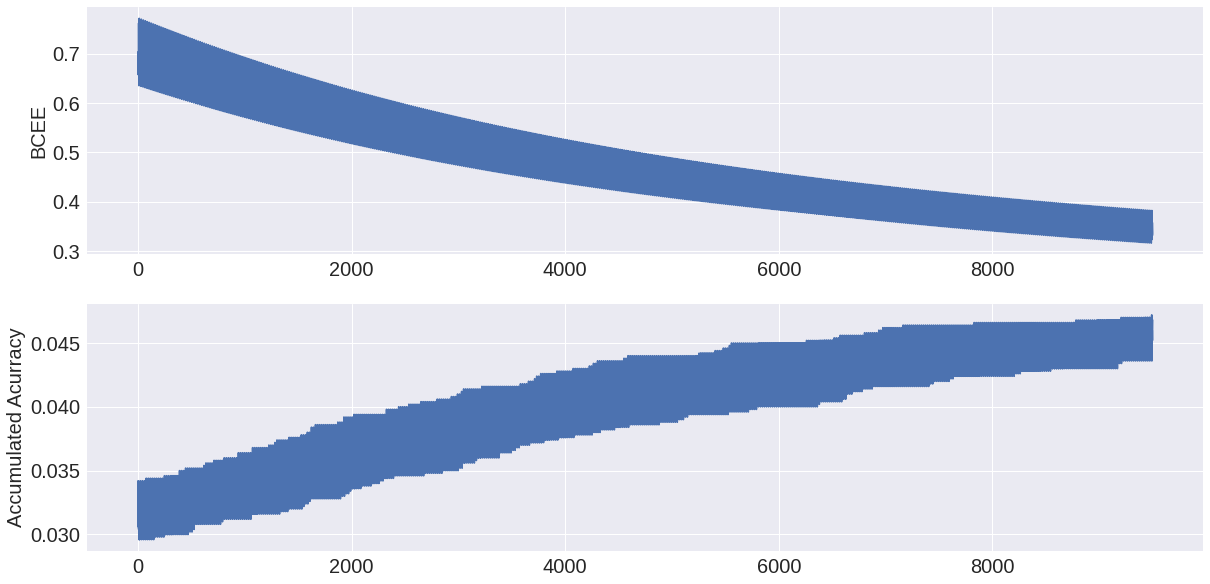

In [45]:
# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('BCEE', fontsize=20)
axes[0].tick_params(labelsize=20)

axes[1].plot(acc_track)
axes[1].set_ylabel('Accumulated Acurracy', fontsize=20)
axes[1].tick_params(labelsize=20)